In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

## Hiring an Attorney or not hiring an Attorney

In [2]:
 df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML PROJECTS\Logistic Regression\claimants.csv")

In [3]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
df = df.drop('CASENUM', axis = 1)

In [5]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [6]:
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [9]:
df['ATTORNEY'].value_counts()

ATTORNEY
0    578
1    518
Name: count, dtype: int64

In [10]:
df['CLMINSUR'].value_counts()

CLMINSUR
1.0    991
0.0    105
Name: count, dtype: int64

## Dividing the data into input and output

In [11]:
X = df.drop('ATTORNEY' , axis = 1)
Y = df['ATTORNEY']

In [12]:
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [13]:
Y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

## Logistic regression and fit the model. 

In [14]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

## Predicting the Model and Confussion Matrix

In [15]:
y_pred = classifier.predict(X)

In [16]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [17]:
y_pred_df = pd.DataFrame({'Actuale': Y , 'Predicted': y_pred})

In [18]:
y_pred_df.head()

,Actuale,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


In [19]:
len(y_pred_df[(y_pred_df['Actuale'] == 1) & (y_pred_df['Predicted'] == 1)])

395

In [20]:
len(y_pred_df[(y_pred_df['Actuale'] == 1) & (y_pred_df['Predicted'] == 0)])

123

In [21]:
len(y_pred_df[(y_pred_df['Actuale'] == 0) & (y_pred_df['Predicted'] == 0)])

381

In [22]:
len(y_pred_df[(y_pred_df['Actuale'] == 0) & (y_pred_df['Predicted'] == 1)])

197

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix = confusion_matrix(Y,y_pred_df['Predicted'])

In [25]:
confusion_matrix

array([[381, 197],
       [123, 395]], dtype=int64)

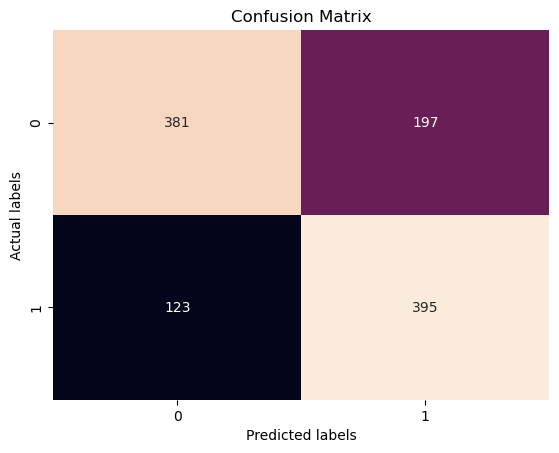

In [26]:
ax = plt.subplot()
sns.heatmap(data = confusion_matrix , annot = True, cbar = False, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 

## Classification report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [28]:
classifier.predict_proba(X)

array([[9.99996954e-01, 3.04592568e-06],
       [4.92832148e-01, 5.07167852e-01],
       [4.24835532e-01, 5.75164468e-01],
       ...,
       [2.60970584e-01, 7.39029416e-01],
       [7.14046063e-01, 2.85953937e-01],
       [3.19569059e-01, 6.80430941e-01]])

In [29]:
# intercept value
classifier.intercept_

array([-0.17354511])

In [30]:
# Other coeffieicents
classifier.coef_

array([[ 0.42687938,  0.57060554, -0.59469538,  0.00653926, -0.38425089]])

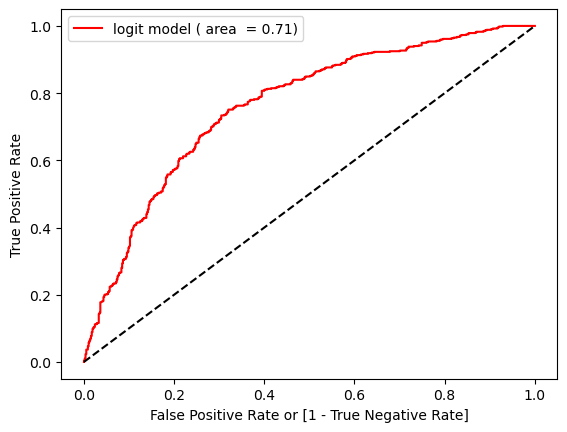

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr,tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[: , 1])
auc = roc_auc_score(Y,y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [32]:
auc

0.7108589063606365